In [1]:
# Connect to google drive from colab to obtain necessary data
# Uncomment if you use it in colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [168]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns

### Download images from the web to google drive. Use only one time.

In [5]:
df = pd.read_csv("/content/drive/My Drive/players_photos.csv", sep=";")
df.head()

,Team,Photo
0,Avalanche,https://cms.nhl.bamgrid.com/images/actionshots...
1,Avalanche,https://cms.nhl.bamgrid.com/images/arena/defau...
2,Avalanche,https://cms.nhl.bamgrid.com/images/actionshots...
3,Avalanche,https://cms.nhl.bamgrid.com/images/actionshots...
4,Avalanche,https://cms.nhl.bamgrid.com/images/actionshots...


In [134]:
PATH = "/content/drive/My Drive/players_photos/"

In [42]:
# Loop for downloading images from the web and save it in google drive

for i in tqdm(range(df.shape[0])):
  r = requests.get(df.iloc[i, 1], stream=True)
  class_ = df.iloc[i, 0]
  if class_ not in os.listdir(PATH):
    os.mkdir(os.path.join(PATH, class_))
  photo_name = "player_" + f"{i}" + ".jpg"
  with open(os.path.join(PATH, class_, photo_name), "wb") as file:
    for block in r.iter_content(chunk_size = 1024): 
      if block:  
        file.write(block)

100%|██████████| 885/885 [03:32<00:00,  4.17it/s]


### Obtain id from the image name to connect to the team in original dataframe

In [28]:
def get_image_id(name):
  a = name.find("_")
  b = name.find(".")
  id = name[a+1:b]
  return int(id)

### Some data analysis

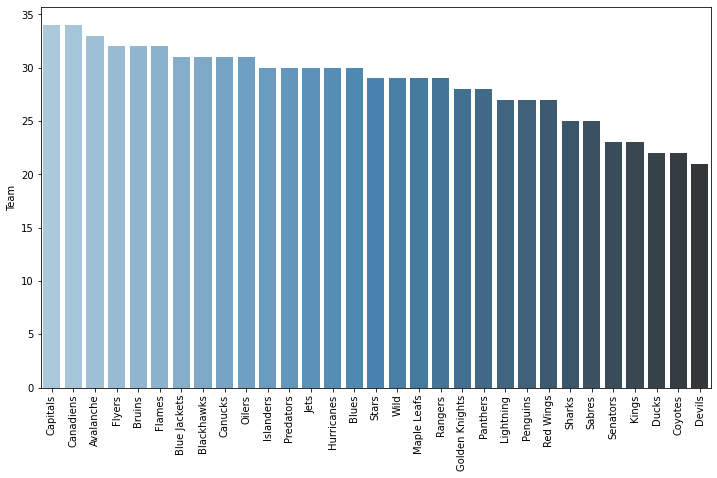

In [65]:
plt.figure(figsize=(12, 7))
sns.barplot(x=df.loc[:, "Team"].value_counts().index, 
            y=df.loc[:, "Team"].value_counts(),
            palette="Blues_d")
plt.xticks(rotation="vertical");

### 1. Prepare data

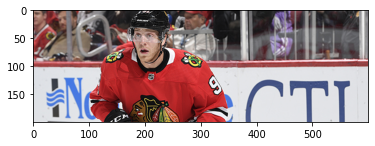

In [174]:
img = plt.imread("/content/drive/My Drive/players_photos/Blackhawks/player_33.jpg")
plt.imshow(img);